In [35]:
import pandas as pd
import numpy as np

In [36]:
sol=pd.read_csv('SMILES-DATA - Equal-1.csv')
sol

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0
...,...,...
401,CC(C)N1CCC(NC(=O)C=C)C1=O,1
402,C=CC(=O)NCC1CC2(CCC2)CO1,1
403,CC(C)C(NC(=O)C=C)C1(CO)CC=CC1,1
404,CC1(CC2CC(C)(C)C1)CN2C(=O)C=C,1


In [37]:
sol.SMILES

0             CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1                  CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2        CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3      COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4                   C=CC(=O)NCC1COC=2C=CC=CC2O1
                         ...                   
401                   CC(C)N1CCC(NC(=O)C=C)C1=O
402                    C=CC(=O)NCC1CC2(CCC2)CO1
403               CC(C)C(NC(=O)C=C)C1(CO)CC=CC1
404               CC1(CC2CC(C)(C)C1)CN2C(=O)C=C
405                    CC(=O)NC1CCN(C1)C(=O)C=C
Name: SMILES, Length: 406, dtype: object

In [38]:
sol.SMILES[8]

'C=CC(=O)NC=1C=CC=C(C1)N2CCCS2(=O)=O'

In [39]:
from rdkit import Chem
#from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFMCS

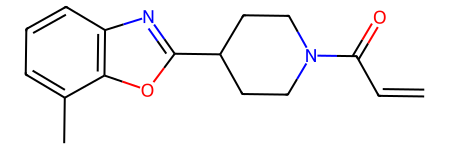

In [40]:
Chem.MolFromSmiles(sol.SMILES[2]) 

In [41]:
for smiles in sol.SMILES[:1]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Display or process the molecular structure as needed
        # For example, you can save the structure as an image
        img = Chem.Draw.MolToImage(mol)
        img.show()
        print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x2C6FBE48220>


In [42]:
mol_list=[]
for element in sol.SMILES:
    mol=Chem.MolFromSmiles(element)
    #print(mol)
    mol_list.append(mol)

In [43]:
len(mol_list)

406

In [44]:
mol_list[:5]

In [45]:
sol.head()

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0


In [46]:
import numpy as np
#from rdkit.Chem import Descriptors

In [47]:
#X=sol.drop(['type','results'],axis='columns')
X=sol.drop(['RESULT'],axis='columns')
Y=sol['RESULT']


In [48]:
X

,SMILES
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4,C=CC(=O)NCC1COC=2C=CC=CC2O1
...,...
401,CC(C)N1CCC(NC(=O)C=C)C1=O
402,C=CC(=O)NCC1CC2(CCC2)CO1
403,CC(C)C(NC(=O)C=C)C1(CO)CC=CC1
404,CC1(CC2CC(C)(C)C1)CN2C(=O)C=C


In [49]:
Y.value_counts()

0    203
1    203
Name: RESULT, dtype: int64

In [50]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

#Generate MACCS fingerprint
from rdkit.Chem import MACCSkeys
fp = MACCSkeys.GenMACCSKeys(mol)
fp

In [51]:
# Obtain the fingerprint as a binary string or array

fp_string = fp.ToBitString()
fp_array = np.array(list(fp_string), dtype=int)
fp_string

'00000000000000000000000000000000001000000000000000000000000000000000000000010001100101100011100010011000100010110000011001100000010001001110001000011001011010111100110'

In [52]:
fp_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [53]:
len(fp_string)

167

In [54]:
fp_array.shape

(167,)

In [55]:
# Assuming `sol` is your DataFrame with the 'SMILES' column

# Define a function to convert SMILES strings to fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fingerprint = np.array(list(fp.ToBitString()), dtype=int)
    return fingerprint

# Apply the function to the 'SMILES' column and create a new column for the fingerprints
sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_fingerprint)

# Access the 'SMILES' and 'Fingerprint' columns
X = sol[['Fingerprint']]
X

sol['Fingerprint_Sum'] = sol['Fingerprint'].apply(lambda x: x.sum())

# Calculate the average of the 'Fingerprint_Sum' column
average_fingerprint_sum = sol['Fingerprint_Sum'].mean()

print(sol['Fingerprint_Sum'])
print(average_fingerprint_sum)

0      48
1      43
2      44
3      52
4      38
       ..
401    43
402    37
403    31
404    35
405    39
Name: Fingerprint_Sum, Length: 406, dtype: int32
39.142857142857146


In [56]:
#sol['Fingerprint_Sum'].hist()

<Axes: >

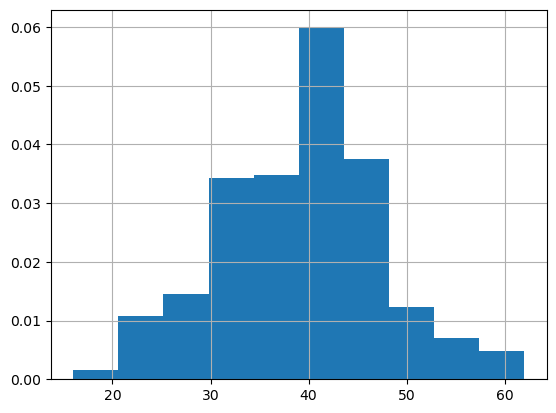

In [57]:
sol['Fingerprint_Sum'].hist(density=1)

In [58]:
#sol2['Fingerprint_Sum'].hist(density=1)

In [59]:
fingerprints = sol['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

     0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
3      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
4      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
401    0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
402    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
403    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
404    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
405    0    0    0    0    0    0    0    0    0    0  ...    0    1    1   

     160  161  162  163  164  165  166  
0      1    1    1    1    1    1 

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,0
402,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0
403,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
404,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,0


In [60]:
Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
401,1
402,1
403,1
404,1


In [61]:
Y.value_counts()

RESULT
0         203
1         203
dtype: int64

In [62]:
# oversampling  SMOTE

#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='minority')
#X_sm, Y_sm = smote.fit_resample(X,Y)

#Y_sm.value_counts()

In [63]:
#Y_sm.to_csv('data-1111.csv', index=False)

In [64]:
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [65]:
X_test.shape

(82, 167)

In [66]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import numpy as np
import joblib

# Assume X_sm and Y_sm are your features and labels respectively
# Parameter grid for GridSearchCV, adjusted for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [30, 50, 70],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2],  # Power parameter for the Minkowski metric
    # 'metric_params': None,  # Additional keyword arguments for the metric function (Not typically tuned)
    'n_jobs': [-1]  # Number of parallel jobs to run
}

# Create a KNN model
knn_model = KNeighborsClassifier()
svm_model=knn_model


# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Configure GridSearchCV with increased verbosity for more detailed search output
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='precision', cv=kf, verbose=3, n_jobs=-1)

# Perform the search
grid_search.fit(X, Y)

# Results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

# Best model (retrained on the entire dataset)
best_model = grid_search.best_estimator_

# Save the retrained model
joblib.dump(best_model, 'svm_model_final.joblib')


Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': -1, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best cross-validation accuracy: 0.693


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['svm_model_final.joblib']

In [71]:
##################################KFOLD##################################################
##################################KFOLD##################################################
##################################KFOLD##################################################

from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.svm import SVC
import numpy as np
import joblib
from sklearn.metrics import recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Assume X_sm and Y_sm are your features and labels respectively

# Create an SVM model
#svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
#svm_model = SVC(C=1, class_weight=None, coef0=0.0, gamma=0.1, kernel='rbf', probability=True)
knn_model = KNeighborsClassifier(
    algorithm = 'auto',
    leaf_size= 30, 
    n_jobs= -1, 
    n_neighbors= 10,
    p= 1, 
    weights= 'uniform'
)

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
#accuracy_scores = cross_val_score(svm_model, X_sm, Y_sm, cv=kf, scoring='precision')
accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

# Perform 10-fold cross-validation for precision
precision_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

recall_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='recall')
f1_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='f1')

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

# Print the average accuracy across all folds
print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")
print(f"\nAverage precision: {np.mean(precision_scores):.3f}")

print(f"Average Recall: {np.mean(recall_scores):.3f}")
print(f"Average F1 Score: {np.mean(f1_scores):.3f}")


# Get probability scores instead of labels
probabilities = cross_val_predict(svm_model, X, Y, cv=kf, method='predict_proba')

# Calculate AUC
# Assuming your positive class is the second column in probabilities output
auc_score = roc_auc_score(Y, probabilities[:, 1])
print("AUC Score:", auc_score)

# If satisfied with the average accuracy, you might choose to retrain the model on the entire dataset
svm_model.fit(X, Y)

# Save the retrained model
joblib.dump(svm_model, 'svm_model_final.joblib')


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Accuracy scores for each fold:
Fold 1: 0.600
Fold 2: 0.583
Fold 3: 0.667
Fold 4: 0.739
Fold 5: 0.591
Fold 6: 0.739
Fold 7: 0.619
Fold 8: 0.632
Fold 9: 0.708
Fold 10: 0.737

Average accuracy: 0.661

Average precision: 0.661
Average Recall: 0.733
Average F1 Score: 0.691


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1116: RuntimeWarning: Number of classes in training fold (2) does not match total number of classes (1). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

In [77]:
#sol2=pd.read_csv('SMILES-DATA - TESTT.csv')


sol2=pd.read_csv('SMILES-DATA - Validation.csv')
sol2

,SMILES,RESULT
0,OC(=O)C[C@H]1CCN(C1)C(=O)C=C,0
1,CC(C)C1(O)CCC(CC1)NC(=O)C=C,0
2,CC1N(CCC=2C=CN=CC12)C(=O)C=C,0
3,OC(=O)C1C(CCN1C(=O)C=C)C2CC2,0
4,COC=1C(F)=CC=CC1N(C)C(=O)C=C,0
...,...,...
59,OC(=O)CC1COC(CNC(=O)C=C)C1,1
60,C=CC(=O)NC=1C=NN(C1)C2CCCC2,1
61,NC(=O)C=1C=CC=NC1N2CCN(CC2)C(=O)C=C,1
62,C=CC(=O)NCCCN1CCS(=O)(=O)CC1,1


In [78]:
# Assuming `sol` is your DataFrame with the 'SMILES' column

# Define a function to convert SMILES strings to fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fingerprint = np.array(list(fp.ToBitString()), dtype=int)
    return fingerprint

# Apply the function to the 'SMILES' column and create a new column for the fingerprints
sol2['Fingerprint'] = sol2['SMILES'].apply(smiles_to_fingerprint)


# Access the 'SMILES' and 'Fingerprint' columns
X = sol2[['Fingerprint']]
X

sol2['Fingerprint_Sum'] = sol2['Fingerprint'].apply(lambda x: x.sum())

# Calculate the average of the 'Fingerprint_Sum' column
average_fingerprint_sum = sol2['Fingerprint_Sum'].mean()

print(sol2['Fingerprint_Sum'])
print(average_fingerprint_sum)

0     38
1     36
2     37
3     37
4     35
      ..
59    38
60    35
61    47
62    56
63    59
Name: Fingerprint_Sum, Length: 64, dtype: int32
41.15625


In [79]:
fingerprints = sol2['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

    0    1    2    3    4    5    6    7    8    9    ...  157  158  159  160  \
0     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   
1     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    1   
2     0    0    0    0    0    0    0    0    0    0  ...    0    1    0    1   
3     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   
4     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    1   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59    0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   
60    0    0    0    0    0    0    0    0    0    0  ...    0    1    0    0   
61    0    0    0    0    0    0    0    0    0    0  ...    0    1    1    0   
62    0    0    0    0    0    0    0    0    0    0  ...    0    1    1    0   
63    0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   

    161  162  163  164  165

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0
60,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,0
61,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
62,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,0


In [80]:
X_train.shape

(324, 167)

In [81]:
Y=sol2[['RESULT']]
#Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
59,1
60,1
61,1
62,1


In [82]:
import joblib
import numpy as np
from sklearn.metrics import precision_score, confusion_matrix, classification_report

################### Load the trained model###############################

#model = joblib.load('svm_model_final.joblib')

################### Load the trained model###############################

# Make predictions using the loaded model
Y_preds =svm_model.predict(X)

# Convert probabilities to binary predictions
Y_pd = (Y_preds > 0.5).astype(int)

# Print the binary predictions
print("Binary Predictions:")
#print(Y_pd)X_sm, Y_sm
print("X", X)
print("Y_preds", Y_preds)

precision_score(Y, Y_pd)

Binary Predictions:
X     0    1    2    3    4    5    6    7    8    9    ...  157  158  159  160  \
0     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   
1     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    1   
2     0    0    0    0    0    0    0    0    0    0  ...    0    1    0    1   
3     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   
4     0    0    0    0    0    0    0    0    0    0  ...    1    1    1    1   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59    0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   
60    0    0    0    0    0    0    0    0    0    0  ...    0    1    0    0   
61    0    0    0    0    0    0    0    0    0    0  ...    0    1    1    0   
62    0    0    0    0    0    0    0    0    0    0  ...    0    1    1    0   
63    0    0    0    0    0    0    0    0    0    0  ...    1    1    1    0   

    1

0.3333333333333333

In [267]:

#########################################  SVM   MODEL#################################################

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


# Create an SVM model
#svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust the parameters as needed
svm_model = SVC(kernel='rbf', C=1.0, gamma=0.1)  # You can adjust the parameters as needed


# Train the SVM model
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Save the trained model
joblib.dump(svm_model, 'svm_model.joblib')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


# Convert y_pred and Y_test to NumPy arrays
y_pred = np.array(y_pred)
Y_test = np.array(Y_test)
# Find the indices of False Positives (FP)
fp_indices = np.where((y_pred == 1) & (Y_test == 0))[0]

# Find the indices of False Negatives (FN)
fn_indices = np.where((y_pred == 0) & (Y_test == 1))[0]

# Print the indices of False Positives and False Negatives
print("False Positives (FP):", fp_indices)
print("False Negatives (FN):", fn_indices)


NameError: name 'X_sm' is not defined

In [ ]:
################################################### Compare ML algorithm#################################################

# Defines and builds the lazyclassifier


import lazypredict
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)


In [ ]:

# Performance table of the training set (80% subset)
predictions_train

In [ ]:
# Performance table of the test set (20% subset)
predictions_test

In [ ]:
############################# Data visualization of model performance#########################################


# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
     

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
     

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [39]:
import autokeras as ak
import numpy as np

# Assuming X_train, X_test, Y_train, Y_test are already defined and preprocessed

# Define the model
reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)

# Fit the model
# Note: AutoKeras' fit method automatically splits the data for validation,
# so you only need to provide the training data here.
reg.fit(X_train, Y_train, epochs=10)

# Evaluate the model
loss, mse = reg.evaluate(X_test, Y_test)
print(f"Test loss: {loss}, MSE: {mse}")

# Predict with the best model.
predictions_test = reg.predict(X_test)

# predictions_test will be in numpy array format. If you need it in the same format as lazypredict's output,
# you might need to manually adjust or process the predictions array.


ModuleNotFoundError: No module named 'autokeras'

In [40]:
import joblib
joblib.dump(svm_model, 'modelFNNFINAL_joblib')

['modelFNNFINAL_joblib']

In [48]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Reshape the target variable to a 1-dimensional array
# Y = np.ravel(Y)

# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Create an instance of the Naive Bayes classifier
# nb_classifier = GaussianNB()

# # Train the classifier using the training data
# nb_classifier.fit(X_train, Y_train)

# # Predict the labels for the test data
# Y_pred = nb_classifier.predict(X_test)

# # Evaluate the accuracy of the classifier
# accuracy = accuracy_score(Y_test,Y_pred)
# print("Accuracy:", accuracy)

# Y_pd = (Y_pred > 0.5).astype(int)
# print("Classification Report: \n", classification_report(Y_test, Y_pd))

In [49]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
3187,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1889,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
1253,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1147,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,1,1,1,1,1,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1143,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2202,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
1846,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [75]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
506,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
2513,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
354,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1080,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,0
2389,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,0
1952,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
29,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
2682,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [76]:
X_val

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
2644,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
1931,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2767,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,0
1288,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
92,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
1229,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0
2760,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3029,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,0


In [77]:
X_train.shape

(1928, 167)

In [78]:
X_val.shape

(643, 167)

In [79]:
X_test.shape

(643, 167)

In [ ]:
# Define GAN parameters
latent_dim = 100
smiles_dim = 166
n_epochs = 10000
batch_size = 128

# Define the generator network
def build_generator(latent_dim, output_dim):
    input_layer = Input(shape=(latent_dim,))
    x = Dense(128, activation='relu')(input_layer)
    x = Dense(256, activation='relu')(x)
    output_layer = Dense(output_dim, activation='sigmoid')(x)
    generator = Model(input_layer, output_layer)
    return generator

# Define the discriminator network
def build_discriminator(input_dim):
    input_layer = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(input_layer)
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    discriminator = Model(input_layer, output_layer)
    return discriminator

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    gan_output = discriminator(generator(gan_input))
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Define functions for generating random noise and training data
def generate_noise(n_samples, latent_dim):
    return np.random.normal(0, 1, (n_samples, latent_dim))

def generate_real_samples(data, n_samples):
    idx = np.random.randint(0, data.shape[0], n_samples)
    return data[idx]

# Build and compile the generator and discriminator
generator = build_generator(latent_dim, smiles_dim)
discriminator = build_discriminator(smiles_dim)
gan = build_gan(generator, discriminator)

# Training loop
for epoch in range(n_epochs):
    # Generate random noise and fake SMILES samples
    noise = generate_noise(batch_size, latent_dim)
    fake_smiles = generator.predict(noise)

    # Generate real SMILES samples (replace 'data' with your actual dataset)
    real_smiles = generate_real_samples(X_train_sm, batch_size)

    # Train the discriminator
    discriminator_loss_real = discriminator.train_on_batch(real_smiles, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_smiles, np.zeros((batch_size, 1)))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train the generator
    noise = generate_noise(batch_size, latent_dim)
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the losses
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Generate new molecular SMILES samples
num_samples = 10
noise = generate_noise(num_samples, latent_dim)
new_smiles = generator.predict(noise)
print("Generated SMILES:")
for smile in new_smiles:
    print(smile)

In [ ]:
# ############# generative model###################### 
from tensorflow.keras.models import load_model
generative_model = svm_model

latent_dim=167

# Define a function to generate new molecular SMILES
def generate_molecular_smiles(generative_model, num_samples=100):
    generated_smiles = []
    for _ in range(num_samples):
        # Generate a random noise vector
        random_noise = np.random.normal(0, 1, (1, latent_dim))
        # Generate SMILES using the generative model
        generated_smile = generative_model.predict(random_noise)[0]
        generated_smiles.append(generated_smile)
    return generated_smiles

# Generate new molecular SMILES
num_samples = 10  # Adjust the number of samples as needed
new_smiles = generate_molecular_smiles(generative_model, num_samples)

# Print the generated SMILES
for i, smile in enumerate(new_smiles):
    print(f'Sample {i+1}: {smile}')

In [ ]:
import numpy as np
from diffusion_models import DiffusionModel

# Load or train your diffusion model
diffusion_model = DiffusionModel()
diffusion_model.train(dataset)


# Define a function to generate molecular SMILES
def generate_molecular_smiles(diffusion_model, num_samples):
    generated_smiles = []
    for _ in range(num_samples):
        # Initialize the initial token sequence
        token_sequence = np.zeros((1, max_length), dtype=np.int32)
        # Generate SMILES using the diffusion model
        for t in range(max_length):
            # Sample from the diffusion model
            next_token_logits = diffusion_model.sample(token_sequence)
            # Sample the next token
            next_token = np.argmax(next_token_logits[0, t])
            # Append the next token to the token sequence
            token_sequence[0, t] = next_token
            # Stop generation if the end token is reached
            if next_token == end_token:
                break
        # Convert the token sequence to a SMILES string
        smile = tokens_to_smiles(token_sequence)
        generated_smiles.append(smile)
    return generated_smiles

# Generate new molecular SMILES
num_samples = 10  # Adjust the number of samples as needed
new_smiles = generate_molecular_smiles(diffusion_model, num_samples)

# Print the generated SMILES
for i, smile in enumerate(new_smiles):
    print(f"Sample {i + 1}: {smile}")


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
